# SI 305 Fall 2024 Final Project Analysis - RQ2

***RQ2: How has the number of successful versus unsuccessful National Labor Relations Board (NLRB) election outcomes changed pre and post COVID-19 pandemic from 2017-2023?***

## Import Libraries

In [11]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

## Load Data

In [12]:
# load and concatenate the data
df_2017 = pd.read_csv('https://drive.google.com/uc?id=1J_2S4ZyKuUVEbAawi-X1pTi56CBIWEc7')
df_2018 = pd.read_csv('https://drive.google.com/uc?id=1cP_hhRKORpacHfN4qtYFVrysbebRSW_g')
df_2019 = pd.read_csv('https://drive.google.com/uc?id=1DTDlTmXRyagAncE9R-pUPVGZGom0AFn6')
df_2020 = pd.read_csv('https://drive.google.com/uc?id=1KHNDqFD0NrC9BlLHQkPQWyi-9G6mFQJ6')
df_2021 = pd.read_csv('https://drive.google.com/uc?id=10ltSNf6Fg7KKhHgPzTtoxm0di3nm61BM')
df_2022 = pd.read_csv('https://drive.google.com/uc?id=1-C74-j6QwUZIKikI8oLXsz70mRTXlDyi')
df_2023 = pd.read_csv('https://drive.google.com/uc?id=1M3f8ipQdR7dZxVEDl2q_TAxksacX9b-L')
election_results = pd.concat([df_2017, df_2018, df_2019, df_2020, df_2021, df_2022, df_2023])
election_results

,Region,Case Number,Case Name,Status,Date Filed,Date Closed,Reason Closed,City,States & Territories,Unit ID,...,Votes Against,Total Ballots Counted,Runoff Required,Challenged Ballots,Challenges are Determinative,Union to Certify,Voting Unit (Unit A),Voting Unit (Unit B),Voting Unit (Unit C),Voting Unit (Unit D)
0,"Region 32, Oakland, California",32-RC-195489,"UAG STEVENS CREEK II, INC. d/b/a AUDI OF STEVE...",Closed,03/24/2017,04/21/2017,Certific. of Representative,San Jose,CA,A,...,2.0,10.0,NaN,2.0,NaN,"MACHINISTS AUTOMOTIVE TRADES LOCAL 1101, DISTR...",All full-time and regular part-time service ad...,NaN,NaN,NaN
1,"Region 29, Brooklyn, New York",29-RC-208496,"Aclara Smart Grid Solutions, LLC",Closed,10/23/2017,12/08/2017,Certific. of Representative,Staten Island,NY,A,...,2.0,90.0,NaN,5.0,NaN,"Communications Workers of America, AFL-CIO",Included: All full-time and regular part-time ...,NaN,NaN,NaN
2,"Region 19, Seattle, Washington",19-RC-209295,PeaceHealth d/b/a PeaceHealth Sacred Heart Med...,Closed,11/06/2017,12/07/2017,Certific. of Representative,Eugene,OR,A,...,64.0,285.0,NaN,8.0,NaN,"PeaceHealth Caregivers United, OFNHP, Local 50...","Included: All full-time, regular part-time, an...",NaN,NaN,NaN
3,"Region 01, Boston, Massachusetts",01-RD-209007,RPP LLC,Closed,10/31/2017,12/07/2017,Certification of Results,Lawrence,MA,A,...,33.0,66.0,NaN,NaN,NaN,International Association of Machinists & Aero...,All full-time and regular part-time employees ...,NaN,NaN,NaN
4,"Region 01, Boston, Massachusetts",01-RC-209139,Island Light and Power Systems Inc.,Closed,11/02/2017,12/07/2017,Certification of Results,Norfolk,MA,A,...,13.0,14.0,NaN,2.0,NaN,International Brotherhood of Electrical Worker...,All full-time and regular part-time electricia...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1886,"Region 04, Philadelphia, Pennsylvania",04-RC-267642,"United Scrap Metal PA, LLC",Closed,10/15/2020,02/08/2023,Certific. of Representative,Philadelphia,PA,A,...,10.0,27.0,NaN,3.0,NaN,Laborers' International Union of North America...,INCLUDED: All full-time and regular part-time ...,NaN,NaN,NaN
1887,"Region 21, Los Angeles, California",21-RD-237218,Kaiser Foundation Hospitals,Closed,03/07/2019,04/28/2023,Certification of Results,MORENO VALLEY,CA,A,...,143.0,264.0,NaN,3.0,NaN,NaN,"INCLUDED: All full-time, regular part-time, li...",NaN,NaN,NaN
1888,"Region 21, Los Angeles, California",21-RD-237218,Kaiser Foundation Hospitals,Closed,03/07/2019,04/28/2023,Certification of Results,MORENO VALLEY,CA,A,...,120.0,231.0,NaN,37.0,Y,NaN,"INCLUDED: All full-time, regular part-time, li...",NaN,NaN,NaN
1889,"Region 31, Los Angeles, California",31-RD-299877,"Spanish Broadcasting System of California, Inc.",Closed,07/21/2022,12/11/2023,Dismissal Non-adjusted,Los Angeles,CA,A,...,NaN,NaN,NaN,NaN,NaN,NaN,"Included: All hosts, announcers, DJs, mixers, ...",NaN,NaN,NaN


In [14]:
# Display summary information about the DataFrame
election_results.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10685 entries, 0 to 1890
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Region                        10685 non-null  object 
 1   Case Number                   10685 non-null  object 
 2   Case Name                     10685 non-null  object 
 3   Status                        10685 non-null  object 
 4   Date Filed                    10685 non-null  object 
 5   Date Closed                   10685 non-null  object 
 6   Reason Closed                 10685 non-null  object 
 7   City                          10684 non-null  object 
 8   States & Territories          10685 non-null  object 
 9   Unit ID                       10685 non-null  object 
 10  Ballot Type                   10685 non-null  object 
 11  Tally Type                    10680 non-null  object 
 12  Tally Date                    10680 non-null  object 
 13  No of E

## Filter Data for Healthcare Sector

In [15]:
# Filter data for healthcare sector
# This will also match continuous strings such as "healthcare", "HealthCare", "HEALTH", etc.
healthcare_data = election_results[election_results['Labor Union1'].str.contains('Health', case=False, na=False)]
healthcare_data

,Region,Case Number,Case Name,Status,Date Filed,Date Closed,Reason Closed,City,States & Territories,Unit ID,...,Votes Against,Total Ballots Counted,Runoff Required,Challenged Ballots,Challenges are Determinative,Union to Certify,Voting Unit (Unit A),Voting Unit (Unit B),Voting Unit (Unit C),Voting Unit (Unit D)
2,"Region 19, Seattle, Washington",19-RC-209295,PeaceHealth d/b/a PeaceHealth Sacred Heart Med...,Closed,11/06/2017,12/07/2017,Certific. of Representative,Eugene,OR,A,...,64.0,285.0,NaN,8.0,NaN,"PeaceHealth Caregivers United, OFNHP, Local 50...","Included: All full-time, regular part-time, an...",NaN,NaN,NaN
7,"Region 02, New York, New York",02-RC-210898,Bon Secours Community Hospital,Closed,12/04/2017,12/29/2017,Certific. of Representative,Port Jervis,NY,A,...,17.0,67.0,NaN,2.0,NaN,1199SEIU United Healthcare Workers East,"INCLUDED: All full-time, regular part-time, ...",NaN,NaN,NaN
9,"Region 02, New York, New York",02-RC-211075,Bon Secours Community Hospital,Closed,12/06/2017,12/29/2017,Certific. of Representative,Port Jervis,NY,A,...,2.0,27.0,NaN,2.0,NaN,1199SEIU United Healthcare Workers East,"INCLUDED: All full-time, regular part-time, a...",NaN,NaN,NaN
13,"Region 07, Detroit, Michigan",07-RC-210682,"SSC Warren Operating Company LLC, d/b/a Warren...",Closed,11/29/2017,12/28/2017,Certific. of Representative,Warren,MI,A,...,NaN,9.0,NaN,2.0,NaN,SEIU Healthcare Michigan,All full-time and regular part-time licensed p...,NaN,NaN,NaN
16,"Region 01, Boston, Massachusetts",01-RD-209228,Brockton Visiting Nurses Association,Closed,11/03/2017,12/27/2017,Certific. of Representative,Brockton,MA,A,...,15.0,32.0,NaN,1.0,NaN,1199 SEIU United Healthcare Workers East,All full-time and regular part-time non-profes...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1803,"Region 18, Minneapolis, Minnesota",18-RC-306683,Mission Point Nursing Home of Ishpeming,Closed,11/03/2022,05/10/2023,Certification of Results,Ishpeming,MI,A,...,1.0,5.0,NaN,2.0,NaN,SEIU Healthcare Michigan,Included: All full-time and regular part-time ...,NaN,NaN,NaN
1814,"Region 01, Boston, Massachusetts",01-RC-305429,"Senior Philanthropy of Milford, LLC d/b/a West...",Closed,10/18/2022,02/10/2023,Certific. of Representative,Milford,CT,A,...,3.0,12.0,NaN,NaN,NaN,"NEW ENGLAND HEALTH CARE EMPLOYEES UNION, DISTR...","All full-time, regular part-time, and per diem...",NaN,NaN,NaN
1819,"Region 02, New York, New York",02-RC-304345,Montefiore Medical Center,Closed,09/30/2022,01/04/2023,Certific. of Representative,Bronx,NY,A,...,26.0,247.0,NaN,18.0,NaN,1199SEIU United Healthcare Workers East,"Included: All regular full time, part time an...",NaN,NaN,NaN
1847,"Region 07, Detroit, Michigan",07-RD-296062,"Fremont Healthcare, LLC d/b/a Regency at Fremont",Closed,05/18/2022,04/07/2023,Certific. of Representative,Detroit,MI,A,...,16.0,19.0,NaN,2.0,NaN,SEIU Healthcare Michigan,All regularly scheduled full-time and regularl...,NaN,NaN,NaN


## Data Cleaning

In [16]:
# Fill missing values with zeros
healthcare_data_filled_zero = healthcare_data.fillna(0)
healthcare_data_filled_zero

,Region,Case Number,Case Name,Status,Date Filed,Date Closed,Reason Closed,City,States & Territories,Unit ID,...,Votes Against,Total Ballots Counted,Runoff Required,Challenged Ballots,Challenges are Determinative,Union to Certify,Voting Unit (Unit A),Voting Unit (Unit B),Voting Unit (Unit C),Voting Unit (Unit D)
2,"Region 19, Seattle, Washington",19-RC-209295,PeaceHealth d/b/a PeaceHealth Sacred Heart Med...,Closed,11/06/2017,12/07/2017,Certific. of Representative,Eugene,OR,A,...,64.0,285.0,0,8.0,0,"PeaceHealth Caregivers United, OFNHP, Local 50...","Included: All full-time, regular part-time, an...",0,0,0
7,"Region 02, New York, New York",02-RC-210898,Bon Secours Community Hospital,Closed,12/04/2017,12/29/2017,Certific. of Representative,Port Jervis,NY,A,...,17.0,67.0,0,2.0,0,1199SEIU United Healthcare Workers East,"INCLUDED: All full-time, regular part-time, ...",0,0,0
9,"Region 02, New York, New York",02-RC-211075,Bon Secours Community Hospital,Closed,12/06/2017,12/29/2017,Certific. of Representative,Port Jervis,NY,A,...,2.0,27.0,0,2.0,0,1199SEIU United Healthcare Workers East,"INCLUDED: All full-time, regular part-time, a...",0,0,0
13,"Region 07, Detroit, Michigan",07-RC-210682,"SSC Warren Operating Company LLC, d/b/a Warren...",Closed,11/29/2017,12/28/2017,Certific. of Representative,Warren,MI,A,...,0.0,9.0,0,2.0,0,SEIU Healthcare Michigan,All full-time and regular part-time licensed p...,0,0,0
16,"Region 01, Boston, Massachusetts",01-RD-209228,Brockton Visiting Nurses Association,Closed,11/03/2017,12/27/2017,Certific. of Representative,Brockton,MA,A,...,15.0,32.0,0,1.0,0,1199 SEIU United Healthcare Workers East,All full-time and regular part-time non-profes...,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1803,"Region 18, Minneapolis, Minnesota",18-RC-306683,Mission Point Nursing Home of Ishpeming,Closed,11/03/2022,05/10/2023,Certification of Results,Ishpeming,MI,A,...,1.0,5.0,0,2.0,0,SEIU Healthcare Michigan,Included: All full-time and regular part-time ...,0,0,0
1814,"Region 01, Boston, Massachusetts",01-RC-305429,"Senior Philanthropy of Milford, LLC d/b/a West...",Closed,10/18/2022,02/10/2023,Certific. of Representative,Milford,CT,A,...,3.0,12.0,0,0.0,0,"NEW ENGLAND HEALTH CARE EMPLOYEES UNION, DISTR...","All full-time, regular part-time, and per diem...",0,0,0
1819,"Region 02, New York, New York",02-RC-304345,Montefiore Medical Center,Closed,09/30/2022,01/04/2023,Certific. of Representative,Bronx,NY,A,...,26.0,247.0,0,18.0,0,1199SEIU United Healthcare Workers East,"Included: All regular full time, part time an...",0,0,0
1847,"Region 07, Detroit, Michigan",07-RD-296062,"Fremont Healthcare, LLC d/b/a Regency at Fremont",Closed,05/18/2022,04/07/2023,Certific. of Representative,Detroit,MI,A,...,16.0,19.0,0,2.0,0,SEIU Healthcare Michigan,All regularly scheduled full-time and regularl...,0,0,0


In [17]:
# creating three new columns, Region Number, Region City, and Region Location, in replace of column Region
# column region had different variales with in it that made it difficult to analyze
split_region = healthcare_data_filled_zero['Region'].str.split(',', expand=True)
healthcare_data_filled_zero['Region Number'] = split_region[0].str.strip()
healthcare_data_filled_zero['Region City'] = split_region[1].str.strip()
healthcare_data_filled_zero['Region State'] = split_region[2].str.strip()

healthcare_data_filled_zero.drop(columns=['Region'], inplace=True)
healthcare_data_filled_zero

,Case Number,Case Name,Status,Date Filed,Date Closed,Reason Closed,City,States & Territories,Unit ID,Ballot Type,...,Challenged Ballots,Challenges are Determinative,Union to Certify,Voting Unit (Unit A),Voting Unit (Unit B),Voting Unit (Unit C),Voting Unit (Unit D),Region Number,Region City,Region State
2,19-RC-209295,PeaceHealth d/b/a PeaceHealth Sacred Heart Med...,Closed,11/06/2017,12/07/2017,Certific. of Representative,Eugene,OR,A,Single Labor Organization,...,8.0,0,"PeaceHealth Caregivers United, OFNHP, Local 50...","Included: All full-time, regular part-time, an...",0,0,0,Region 19,Seattle,Washington
7,02-RC-210898,Bon Secours Community Hospital,Closed,12/04/2017,12/29/2017,Certific. of Representative,Port Jervis,NY,A,Single Labor Organization,...,2.0,0,1199SEIU United Healthcare Workers East,"INCLUDED: All full-time, regular part-time, ...",0,0,0,Region 02,New York,New York
9,02-RC-211075,Bon Secours Community Hospital,Closed,12/06/2017,12/29/2017,Certific. of Representative,Port Jervis,NY,A,Single Labor Organization,...,2.0,0,1199SEIU United Healthcare Workers East,"INCLUDED: All full-time, regular part-time, a...",0,0,0,Region 02,New York,New York
13,07-RC-210682,"SSC Warren Operating Company LLC, d/b/a Warren...",Closed,11/29/2017,12/28/2017,Certific. of Representative,Warren,MI,A,Single Labor Organization,...,2.0,0,SEIU Healthcare Michigan,All full-time and regular part-time licensed p...,0,0,0,Region 07,Detroit,Michigan
16,01-RD-209228,Brockton Visiting Nurses Association,Closed,11/03/2017,12/27/2017,Certific. of Representative,Brockton,MA,A,Single Labor Organization,...,1.0,0,1199 SEIU United Healthcare Workers East,All full-time and regular part-time non-profes...,0,0,0,Region 01,Boston,Massachusetts
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1803,18-RC-306683,Mission Point Nursing Home of Ishpeming,Closed,11/03/2022,05/10/2023,Certification of Results,Ishpeming,MI,A,Single Labor Organization,...,2.0,0,SEIU Healthcare Michigan,Included: All full-time and regular part-time ...,0,0,0,Region 18,Minneapolis,Minnesota
1814,01-RC-305429,"Senior Philanthropy of Milford, LLC d/b/a West...",Closed,10/18/2022,02/10/2023,Certific. of Representative,Milford,CT,A,Single Labor Organization,...,0.0,0,"NEW ENGLAND HEALTH CARE EMPLOYEES UNION, DISTR...","All full-time, regular part-time, and per diem...",0,0,0,Region 01,Boston,Massachusetts
1819,02-RC-304345,Montefiore Medical Center,Closed,09/30/2022,01/04/2023,Certific. of Representative,Bronx,NY,A,Single Labor Organization,...,18.0,0,1199SEIU United Healthcare Workers East,"Included: All regular full time, part time an...",0,0,0,Region 02,New York,New York
1847,07-RD-296062,"Fremont Healthcare, LLC d/b/a Regency at Fremont",Closed,05/18/2022,04/07/2023,Certific. of Representative,Detroit,MI,A,Single Labor Organization,...,2.0,0,SEIU Healthcare Michigan,All regularly scheduled full-time and regularl...,0,0,0,Region 07,Detroit,Michigan


## Define Success of Elections

In [18]:
# Defining whether an election was successful or not
# Successful meaning a labor agreement was reached and voted on by the union and employer
healthcare_data_filled_zero['Successful'] = healthcare_data_filled_zero['Votes for Labor Union1'] > healthcare_data_filled_zero['Votes Against']

## Add Year and Period Columns

In [19]:
# Defining/Adding columns for pre-/during-/post-pandemic periods
healthcare_data_filled_zero['Year'] = pd.to_datetime(healthcare_data_filled_zero['Tally Date']).dt.year
healthcare_data_filled_zero['Period'] = healthcare_data_filled_zero['Year'].apply(
    lambda x: 'Pre-Pandemic' if 2017 <= x <= 2019 else ('Pandemic' if 2020 <= x <= 2021 else 'Post-Pandemic')
)
healthcare_data_filled_zero

,Case Number,Case Name,Status,Date Filed,Date Closed,Reason Closed,City,States & Territories,Unit ID,Ballot Type,...,Voting Unit (Unit A),Voting Unit (Unit B),Voting Unit (Unit C),Voting Unit (Unit D),Region Number,Region City,Region State,Successful,Year,Period
2,19-RC-209295,PeaceHealth d/b/a PeaceHealth Sacred Heart Med...,Closed,11/06/2017,12/07/2017,Certific. of Representative,Eugene,OR,A,Single Labor Organization,...,"Included: All full-time, regular part-time, an...",0,0,0,Region 19,Seattle,Washington,True,2017,Pre-Pandemic
7,02-RC-210898,Bon Secours Community Hospital,Closed,12/04/2017,12/29/2017,Certific. of Representative,Port Jervis,NY,A,Single Labor Organization,...,"INCLUDED: All full-time, regular part-time, ...",0,0,0,Region 02,New York,New York,True,2017,Pre-Pandemic
9,02-RC-211075,Bon Secours Community Hospital,Closed,12/06/2017,12/29/2017,Certific. of Representative,Port Jervis,NY,A,Single Labor Organization,...,"INCLUDED: All full-time, regular part-time, a...",0,0,0,Region 02,New York,New York,True,2017,Pre-Pandemic
13,07-RC-210682,"SSC Warren Operating Company LLC, d/b/a Warren...",Closed,11/29/2017,12/28/2017,Certific. of Representative,Warren,MI,A,Single Labor Organization,...,All full-time and regular part-time licensed p...,0,0,0,Region 07,Detroit,Michigan,True,2017,Pre-Pandemic
16,01-RD-209228,Brockton Visiting Nurses Association,Closed,11/03/2017,12/27/2017,Certific. of Representative,Brockton,MA,A,Single Labor Organization,...,All full-time and regular part-time non-profes...,0,0,0,Region 01,Boston,Massachusetts,True,2017,Pre-Pandemic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1803,18-RC-306683,Mission Point Nursing Home of Ishpeming,Closed,11/03/2022,05/10/2023,Certification of Results,Ishpeming,MI,A,Single Labor Organization,...,Included: All full-time and regular part-time ...,0,0,0,Region 18,Minneapolis,Minnesota,True,2022,Post-Pandemic
1814,01-RC-305429,"Senior Philanthropy of Milford, LLC d/b/a West...",Closed,10/18/2022,02/10/2023,Certific. of Representative,Milford,CT,A,Single Labor Organization,...,"All full-time, regular part-time, and per diem...",0,0,0,Region 01,Boston,Massachusetts,True,2022,Post-Pandemic
1819,02-RC-304345,Montefiore Medical Center,Closed,09/30/2022,01/04/2023,Certific. of Representative,Bronx,NY,A,Single Labor Organization,...,"Included: All regular full time, part time an...",0,0,0,Region 02,New York,New York,True,2022,Post-Pandemic
1847,07-RD-296062,"Fremont Healthcare, LLC d/b/a Regency at Fremont",Closed,05/18/2022,04/07/2023,Certific. of Representative,Detroit,MI,A,Single Labor Organization,...,All regularly scheduled full-time and regularl...,0,0,0,Region 07,Detroit,Michigan,False,2022,Post-Pandemic


## Filter Data for Relevant Years

In [20]:
# Filter data to only include years 2017 to 2023
filtered_healthcare_data = healthcare_data_filled_zero[healthcare_data_filled_zero['Year'].between(2017, 2023)]
filtered_healthcare_data

,Case Number,Case Name,Status,Date Filed,Date Closed,Reason Closed,City,States & Territories,Unit ID,Ballot Type,...,Voting Unit (Unit A),Voting Unit (Unit B),Voting Unit (Unit C),Voting Unit (Unit D),Region Number,Region City,Region State,Successful,Year,Period
2,19-RC-209295,PeaceHealth d/b/a PeaceHealth Sacred Heart Med...,Closed,11/06/2017,12/07/2017,Certific. of Representative,Eugene,OR,A,Single Labor Organization,...,"Included: All full-time, regular part-time, an...",0,0,0,Region 19,Seattle,Washington,True,2017,Pre-Pandemic
7,02-RC-210898,Bon Secours Community Hospital,Closed,12/04/2017,12/29/2017,Certific. of Representative,Port Jervis,NY,A,Single Labor Organization,...,"INCLUDED: All full-time, regular part-time, ...",0,0,0,Region 02,New York,New York,True,2017,Pre-Pandemic
9,02-RC-211075,Bon Secours Community Hospital,Closed,12/06/2017,12/29/2017,Certific. of Representative,Port Jervis,NY,A,Single Labor Organization,...,"INCLUDED: All full-time, regular part-time, a...",0,0,0,Region 02,New York,New York,True,2017,Pre-Pandemic
13,07-RC-210682,"SSC Warren Operating Company LLC, d/b/a Warren...",Closed,11/29/2017,12/28/2017,Certific. of Representative,Warren,MI,A,Single Labor Organization,...,All full-time and regular part-time licensed p...,0,0,0,Region 07,Detroit,Michigan,True,2017,Pre-Pandemic
16,01-RD-209228,Brockton Visiting Nurses Association,Closed,11/03/2017,12/27/2017,Certific. of Representative,Brockton,MA,A,Single Labor Organization,...,All full-time and regular part-time non-profes...,0,0,0,Region 01,Boston,Massachusetts,True,2017,Pre-Pandemic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1803,18-RC-306683,Mission Point Nursing Home of Ishpeming,Closed,11/03/2022,05/10/2023,Certification of Results,Ishpeming,MI,A,Single Labor Organization,...,Included: All full-time and regular part-time ...,0,0,0,Region 18,Minneapolis,Minnesota,True,2022,Post-Pandemic
1814,01-RC-305429,"Senior Philanthropy of Milford, LLC d/b/a West...",Closed,10/18/2022,02/10/2023,Certific. of Representative,Milford,CT,A,Single Labor Organization,...,"All full-time, regular part-time, and per diem...",0,0,0,Region 01,Boston,Massachusetts,True,2022,Post-Pandemic
1819,02-RC-304345,Montefiore Medical Center,Closed,09/30/2022,01/04/2023,Certific. of Representative,Bronx,NY,A,Single Labor Organization,...,"Included: All regular full time, part time an...",0,0,0,Region 02,New York,New York,True,2022,Post-Pandemic
1847,07-RD-296062,"Fremont Healthcare, LLC d/b/a Regency at Fremont",Closed,05/18/2022,04/07/2023,Certific. of Representative,Detroit,MI,A,Single Labor Organization,...,All regularly scheduled full-time and regularl...,0,0,0,Region 07,Detroit,Michigan,False,2022,Post-Pandemic


## Summarize Success vs. Unsuccessful Counts

In [21]:
# summarizing successful vs. unsuccessful counts; False = unsuccessful, True = successful
# .unstack() rearranges the summarized data so that each period has separate columns for successful and unsuccessful counts
summary = filtered_healthcare_data.groupby(['Year', 'Successful']).size().unstack().fillna(0)
summary

Successful,False,True
Year,,
2017,39,139
2018,22,85
2019,19,75
2020,13,57
2021,24,76
2022,26,102
2023,14,127


## Visulizations

### Bar Plot Graph: Successful vs. Unsuccessful Union Elections

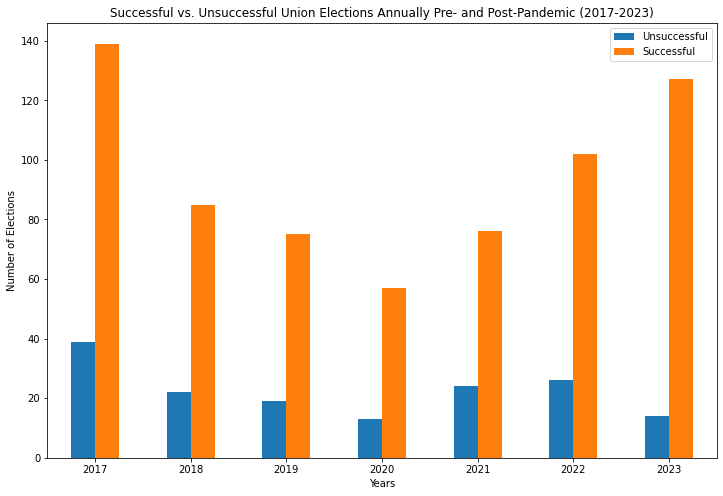

In [23]:
# bar plot for successful vs. unsuccessful elections
fig, ax = plt.subplots(figsize=(12, 8))
summary.plot(kind='bar', ax=ax)

# Customizing the x-axis
years = [2017, 2018, 2019, 2020, 2021, 2022, 2023]
ax.set_xticks(range(len(years)))
ax.set_xticklabels(years)

plt.title('Successful vs. Unsuccessful Union Elections Annually Pre- and Post-Pandemic (2017-2023)')
plt.xlabel('Years')
plt.ylabel('Number of Elections')
plt.legend(['Unsuccessful', 'Successful'])
plt.xticks(rotation=0)
plt.show()

### Line Plot Graph: Calculation of Success Rates in Union Elections

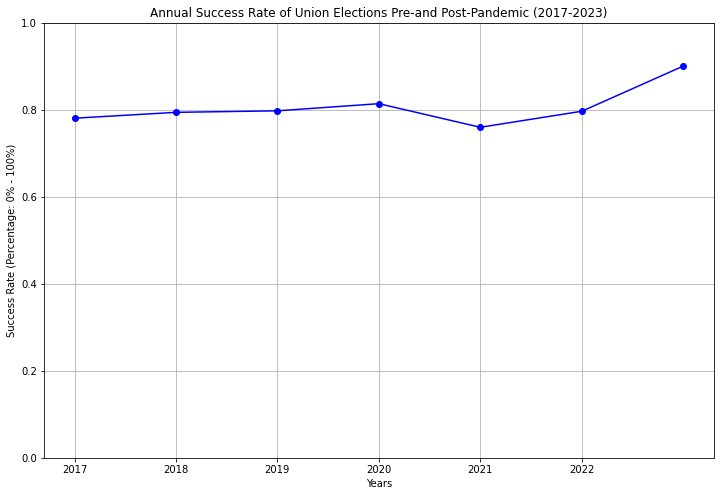

In [24]:
# Calculate success rate annually: success_rate = successful / (successful + unsuccessful)
summary['Success Rate'] = summary[True] / (summary[True] + summary[False])

# Plot success rate
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(summary.index, summary['Success Rate'], marker='o', linestyle='-', color='b')
ax.set_title('Annual Success Rate of Union Elections Pre-and Post-Pandemic (2017-2023)')
ax.set_xlabel('Years')
ax.set_ylabel('Success Rate (Percentage: 0% - 100%)')
ax.set_xticks(range(2017, 2023))
ax.set_xticklabels([str(year) for year in range(2017, 2023)])
ax.set_ylim([0, 1])  # Success rate ranges from 0 to 1
ax.grid(True)
plt.show()